# Data Mining Lab 2

### Student Information
Name:  余頡

Student ID:  109136503

GitHub ID:  knjo5566 ,  20663759

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)


### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

---
# First Part

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
## >>> Exercise 1 (Take home): 
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [5]:
import numpy as np

## fuction to create a array for frequency
def count_frequency( counts ):
    term_frequencies = []
    for j in range(0,counts.shape[1]):
        term_frequencies.append(sum(counts[:,j].toarray()))
    term_frequencies = np.asarray(counts.sum(axis=0))[0]
    return term_frequencies

In [6]:
## fuction to sort word dataframe
def sort_data(count_vect , sort_data):
    ## tokenize the text 
    df_counts = count_vect.fit_transform(sort_data.text)
    
    ## creat a dataframe of wold and frequency 
    df_sort = pd.DataFrame(count_vect.get_feature_names() , columns= ['words'] )
    df_sort['frequency'] = count_frequency(df_counts)[0:len(df_sort)]
    
    ## sort the data by frequency 
    df_sort.sort_values(by='frequency' , ascending=False, axis =0 , inplace=True)
    return df_sort

In [7]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

train_sort = sort_data(count_vect , train_df)
print ("Top 30 world in training data : \n" ,train_sort[0:30] , "\n")

test_sort = sort_data(count_vect , test_df)
print ("Top 30 world in testing data : \n" ,test_sort[0:30])

Top 30 world in training data : 
       words  frequency
8930    the       1736
9119     to       1289
537     and        955
10051   you        796
6371     of        793
4546     is        787
4571     it        717
4383     in        626
8924   that        537
5957     my        535
3391    for        446
6422     on        390
976      be        383
5577     me        380
9020   this        350
8264     so        328
4009   have        312
6235    not        303
4798   just        301
1448    but        293
9872   with        288
757      at        269
1504    can        257
464     all        243
5186   like        243
670     are        231
10059  your        229
9678    was        228
9782   when        226
4319     if        216 

Top 30 world in testing data : 
      words  frequency
1687   the        153
1739    to        138
99     and         92
1240    of         83
909     it         83
1938   you         82
903     is         77
867     in         69
655    for         5

---
## >>> Exercise 2 (Take home): 
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## instantiate vectorizer with feature 1000
TF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

In [10]:
## use TfidfVectorizer, which is the equivalent of CountVectorizer followed by TfidfTransformer
train_df_TF_1000 = TF_vectorizer.fit_transform(train_df['text'])
feature_names = TF_vectorizer.get_feature_names()
print ("Feature name of training dat : " ,feature_names[100:110])

Feature name of training dat :  ['awareness', 'away', 'awe', 'awesome', 'awful', 'b', 'baby', 'back', 'bad', 'ball']


---
##  >>> Exercise 3 (Take home): 
Can you interpret the results above? What do they mean?

### What is the result above?

The plot above is the confusion matrix be ploted with certain color pattern.


### What do they mean?

We can observe the x & y label. X laber is `True`, implies what the emotion of the text actually is. On the other hand, Y label, `predicted` shows the predicted emotion. So, only the center parts (the `predicted` class is same to `true` class) are correct prediction.

By the number on the plot, We can first see that the testing data predicted correctly are major, and we can know the recall rate and precision by line and row. And we can soon find out that the fear part be predicted more than other emotion. This is due to the data imbalance, the fear class is more than other three, so it's normal that we get a imbalance result.

---
##  >>> Exercise 4 (Take home):  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data, so that the testing data will be vectorized by vectors in training data 
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [12]:
## build Naive Bayes model and training
NB_model = MultinomialNB()
NB_model.fit(X_train,y_train)

## predict
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [13]:
## get the predicted result. 
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)),"\n")

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.79
testing accuracy: 0.69 

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



In [14]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 8 85  5 12]
 [10  8 55  6]
 [11 10  7 46]]


---
## >>> Exercise 5 (Take home): 

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Differences between two model 

1. The accuracy score of `training` data is hugely different, DT model is better than NB model.
2. Some how the perfomance (precision & recall) shows that NB model is better.

### My opinions
1. The branch on Decision Tree is decide by the value of certain vector(feature), it will take a risk of `overfitting` if the feature has no actual correlation with outcome, or the training data and testing data is bias.
2. NB model predicts the result by computing the maximum likehood, so it will get the result by sum up all the posterior probabilty of words, in this method, the model has higher variance and lower bias. 
3. NB model has more robustness to outlier and high dimension data compare to DT model. The practicality of DT model will reduce rapidly as dimension going higher, and it's so call `curse of dimension`, the DT model make a prediction by just several features in such high dimension data. 

---



###  Deal with categorical label (y)


In [15]:
import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

###  Build model

In [16]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0   

###  Train

In [17]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 86us/step - loss: 1.3377 - accuracy: 0.3546 - val_loss: 1.3037 - val_accuracy: 0.4265
Epoch 2/25
3613/3613 [==============================] - 0s 44us/step - loss: 1.0361 - accuracy: 0.6286 - val_loss: 0.9512 - val_accuracy: 0.6398
Epoch 3/25
3613/3613 [==============================] - 0s 44us/step - loss: 0.6100 - accuracy: 0.7822 - val_loss: 0.7740 - val_accuracy: 0.7089
Epoch 4/25
3613/3613 [==============================] - 0s 44us/step - loss: 0.4259 - accuracy: 0.8453 - val_loss: 0.8084 - val_accuracy: 0.6859
Epoch 5/25
3613/3613 [==============================] - 0s 44us/step - loss: 0.3371 - accuracy: 0.8813 - val_loss: 0.8415 - val_accuracy: 0.7032
Epoch 6/25
3613/3613 [==============================] - 0s 43us/step - loss: 0.2721 - accuracy: 0.9076 - val_loss: 0.8472 - val_accuracy: 0.7003
Epoch 7/25
3613/3613 [==============================] - 0s 41us/step - loss: 0.218

###  Predict on testing data

In [18]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

## import the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

---
##  >>> Exercise 6 (Take home):  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

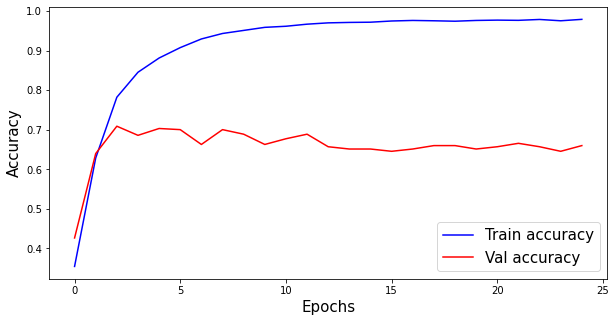

In [19]:
import matplotlib.pyplot as plt

## set up figure size
plt.figure(figsize = (10,5))
plt.plot(training_log['accuracy'], color = 'b',label = "Train accuracy")
plt.plot(training_log['val_accuracy'], color = 'r' ,label = "Val accuracy")
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend(loc='best',fontsize =15)
plt.show()

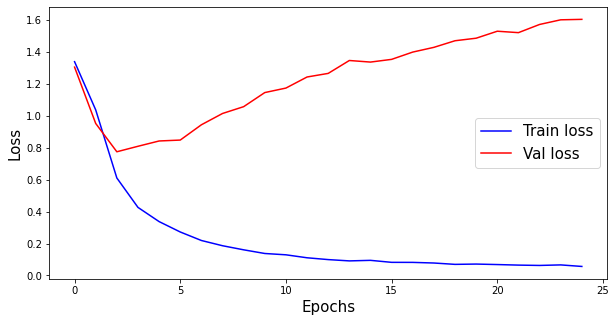

In [20]:
plt.figure(figsize = (10,5))
plt.plot(training_log['loss'], color = 'b',label = "Train loss")
plt.plot(training_log['val_loss'], color = 'r' ,label = "Val loss")
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend(loc='best',fontsize =15)
plt.show()

### How do i interpret the plot above ?

By the label we know the plots are accuarcy and loss trend as Epochs increasing. And the data is come from the `training log` which recoded the score in each epoch.

### How are they related to the concept of overfitting/underfitting covered in class?

+ We first observed the `accuracy` plot :  Accuracy increase rapidly in the begining. Then the curve go smooth, accuracy of training data is close to `0.97`, but testing only `0.65` and even decline a little bit. 
    - The begin decline is because the model train well after several Epochs. The model find better network assemblance, and the previous part with low accuary is  **underfittiing**. 
    - The reason why training accuary can not converge to almost `1` is because the **noise**, which make the prediction have certain uncertainty. 
    - This **gap** between training and testing data is because the insufficient train data, it can represent the whole data set, and it's so call **bias of data set**.


+ We then observed the `loss` plot : Loss decline rapidly in the begining. Then the loss of training data go smooth, however,  the testing one grow abruptly. 
    - The begin high loss is because the model didn't train well (underfitting).
    - The reason why the `loss` part grow up is our model trained to fit the training data too much, for example, some node inside the network might increase the performance of training data set. But, as i mention above, data hardly is unbias, so, the model be train too well to fit the training data, **even the noise and the bias**, and this is so call **overfitting**. In the result, this overfitting part turn out to be the error / loss.

---

###  Prepare training corpus

In [21]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

## create the training corpus
training_corpus = train_df['text_tokenized'].values

###  Training our model

In [22]:
from gensim.models import Word2Vec

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3100,40273,@DoubleEph sadly his best days are behind him,"[@, DoubleEph, sadly, his, best, days, are, be..."
2754,30750,@bear_ing you asshole... you made me sexually ...,"[@, bear_ing, you, asshole, ..., you, made, me..."
3168,40341,One way ticket to the blues.,"[One, way, ticket, to, the, blues, .]"
2364,30360,Not untill today has anyone ever said to me th...,"[Not, untill, today, has, anyone, ever, said, ..."
828,10828,I love when #girls are busy in teaching how to...,"[I, love, when, #, girls, are, busy, in, teach..."


In [23]:
## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

###  Generating word vector (embeddings)

In [24]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']

# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('Makes', 0.9596039056777954),
 ('successful', 0.951937198638916),
 ('help', 0.9414056539535522),
 ('cats', 0.9354199767112732),
 ('memories😊', 0.9306946992874146),
 ('now', 0.928034245967865),
 ('RiceFODays', 0.9252266883850098),
 ("'you", 0.9238051176071167),
 ('apart', 0.923623263835907),
 ('CFL', 0.9227466583251953)]

---
## >>> Exercise 7 (Take home): 

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### What would i do :
As the above programing and output, we can get relation between words. So, to utilize the vector to predict the sentence. Maybe I can sum up the relation between the predict word and each word in the sentence. 

**example :**
If I want to predict the emtion of the sentence,
I can average all the correlative score of word, and choose the higher one to be predicted outcome. 

In [26]:
## e.g. the relation between school and fear.
print ("coerelation with anger: ", word2vec_model.similarity('school' ,'anger')) 
print ("coerelation with joy : ", word2vec_model.similarity('school' ,'joy')) 


coerelation with anger:  0.9706893
coerelation with joy :  0.8539695


In [27]:
## fuction to compute score of each predicted emotion
def count_score( emotions, token ):
    ## create score list
    score = np.zeros(len(emotions))
    i = 0
    for emotion in emotions :
        for word in token :
            score[i] = score[i] + word2vec_model.similarity(word , emotion)
        i+=1
    return score

In [28]:
## the emotion list I want to predict.
emotion = ['anger','fear','joy','sadness']

## Take the first sentence for demostration
emotion_score =  count_score(emotion , train_df['text_tokenized'][0])
print ("predict sentence : " , train_df['text'][0])
print (emotion_score)

## get the max value index
index = np.argmax (emotion_score,axis=0)
print ("Predicted emotion is :" ,emotion[index])

predict sentence :  How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##
[21.63025784 20.85194886 19.73679674 21.45307168]
Predicted emotion is : anger


In [29]:
## predict other sentence. Take "I have to work" for example. 
import re
sentence = "I have to work"
## Split sentence into word.
spilt_sentence = re.split('\s+', sentence)

emotion_score =  count_score(emotion , spilt_sentence)
print ("predict sentence : " , sentence)
print (emotion_score)
index = np.argmax (emotion_score,axis=0)
print ("Predicted emotion is :" ,emotion[index])

predict sentence :  I have to work
[3.09156013 2.88995928 2.14264995 2.61122307]
Predicted emotion is : anger


By the code above, we can get a predicted emotion of a sentence by other word vectors we have.

---
###  Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [30]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


---
###  >>> Exercise 8 (Take home):   

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

###  Plot using t-SNE (2-dimension)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

###  Plot using t-SNE (3-dimension)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
## t-SNE model, set components to 3 with PCA to be initialtion
tsne = TSNE(n_components=3, init='pca', random_state=0 ,perplexity= 30,n_iter=1000)
## training
X_tsne = tsne.fit_transform(X_traain)

## set 3D plot
fig = plt.figure(figsize=(10, 10))

ax = Axes3D(fig)
# add zaxis for the third dimension.
for label, x, y , z in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1],X_tsne[:target_size, 2]):
    ax.text(x,y,z,  '%s' % (label), size=10, zorder=1,  color='k') 
    
ax.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1],X_tsne[:target_size, 2],s =30, c=color)
ax.view_init(20, 50)
plt.show()

### what i observe ?
It's supprise about the result in the 3D-plot with a worse classification. We can saw that in 2D-plot is remarkablely distinguishable, however they mix together when component going up to 3.

### why this happen ?
As the theory of PCA, we know that the components come from the projections in each eigenvector, so the distribution will just get a new value when dimension increase. However, t-SNE do the dimension reduction by probability fuction, it tend to keep the local feature by **transforming the Euclidean distance to probability**, so some intrinsic information is hard to be projected to lower dimension. Meanwhile, when projected dimension increase, we will take a risk to find a local singularity, which might have a worse performance than 2 dimension.